In [42]:
nips_seed = 20180518
import numpy as np
np.random.seed(nips_seed)
import sys
import os
sys.path.append('../')
import random as rn
rn.seed(nips_seed)
import os
os.environ['PYTHONHASHSEED'] = '0'
import pandas as pd
import data_utils
import matplotlib.pyplot as plt
import factorialhmm
%load_ext autoreload
%autoreload 2

OUTPUT_LENGTH = 599
ADDITIONAL_WINDOW = 0
data = data_utils.DataHandler(output_length = OUTPUT_LENGTH, additional_window = ADDITIONAL_WINDOW)
data.read_data('ukdale')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
building_1_kettle.csv (100799,)
building_1_microwave.csv (100800,)
building_1_fridge.csv (100799,)
building_1_dish_washer.csv (100800,)
building_1_washing_machine.csv (100800,)
/home/chshin/kdd-19/data/ukdale/building_1_mains.csv (100800,)
building_2_kettle.csv (100800,)
building_2_microwave.csv (100795,)
building_2_fridge.csv (100795,)
building_2_dish_washer.csv (100794,)
building_2_washing_machine.csv (100794,)
/home/chshin/kdd-19/data/ukdale/building_2_mains.csv (100801,)
building_3_kettle.csv (100800,)
/home/chshin/kdd-19/data/ukdale/building_3_mains.csv (100798,)
building_4_kettle.csv (74633,)
building_4_fridge.csv (100801,)
/home/chshin/kdd-19/data/ukdale/building_4_mains.csv (100800,)
building_5_kettle.csv (86400,)
building_5_microwave.csv (86400,)
building_5_fridge.csv (86400,)
building_5_dish_washer.csv (86400,)
building_5_washing_machine.csv (86400,)
/home/chshin/kdd-19/data/ukdale/buildin

In [43]:
fhmm = factorialhmm.FHMM()
fhmm.data_converter(data)


1
3
4
5
2


In [88]:
fhmm.train()

Training for kettle


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for kettle are
[[1.12901820e+00]
 [2.38714545e+03]]
Training for microwave


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for microwave are
[[  23.64693285]
 [1412.58870332]]
Training for fridge


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for fridge are
[[ 0.        ]
 [98.55728539]]
Training for dish_washer


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for dish_washer are
[[4.81123069e-01]
 [7.15181160e+02]]
Training for washing_machine


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for washing_machine are
[[  7.28655721]
 [603.70124742]]


In [84]:
import itertools
from six import iteritems
from copy import deepcopy
from collections import OrderedDict
from hmmlearn import hmm

x_train = fhmm.main['train']
y_train = fhmm.apps['train']
models = {}
for appliance in fhmm.appliance_list:
    print("Training for", appliance)
    o = []
    for seq in y_train[appliance]:
        #seq = seq.reshape((seq.shape[0], 1))
        activation = (seq > 10).sum() * 1.0 / len(seq)
        if activation > 0:
            #o.append(seq)
            o = o + list(seq)

    if len(o) >= 1:
        o = np.array(o).reshape((-1,1))
        mod = hmm.GaussianHMM(2, "full")
        mod.fit(o)
        models[appliance] = mod
        print("Means for %s are" % appliance)
        print(mod.means_)
    else:
        print("Not enough samples for %s" % appliance)

new_learnt_models = OrderedDict()
for appliance, appliance_model in iteritems(models):
    print(appliance_model)
    startprob, means, covars, transmat = factorialhmm.sort_learnt_parameters(
        appliance_model.startprob_, appliance_model.means_,
        appliance_model.covars_, appliance_model.transmat_)
    new_learnt_models[appliance] = hmm.GaussianHMM(
        startprob.size, "full", startprob, transmat)
    new_learnt_models[appliance].means_ = means
    new_learnt_models[appliance].covars_ = covars
    new_learnt_models[appliance].startprob_ = startprob
    new_learnt_models[appliance].transmat_ = transmat
    

learnt_model_combined = factorialhmm.create_combined_hmm(new_learnt_models)
fhmm.individual = new_learnt_models
fhmm.model = learnt_model_combined
fhmm.x_train = x_train
fhmm.y_train = y_train

Training for kettle


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/hmmlearn/base.py:465: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  return logsumexp(fwdlattice[-1]), fwdlattice
/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/hmmlearn/utils.py:46: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  a_lse = logsumexp(a, axis)


Means for kettle are
[[1.12901820e+00]
 [2.38714545e+03]]
Training for microwave


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for microwave are
[[  23.64693285]
 [1412.58870332]]
Training for fridge


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for fridge are
[[ 0.        ]
 [98.55728539]]
Training for dish_washer


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for dish_washer are
[[4.81123069e-01]
 [7.15181160e+02]]
Training for washing_machine


/home/chshin/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Means for washing_machine are
[[  7.28655721]
 [603.70124742]]
GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)
GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)
GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)
G

In [89]:
fhmm.test()

/home/chshin/nilmtk/nilmtk/factorialhmm.py:286: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Model


kettle
microwave
fridge
dish_washer
washing_machine


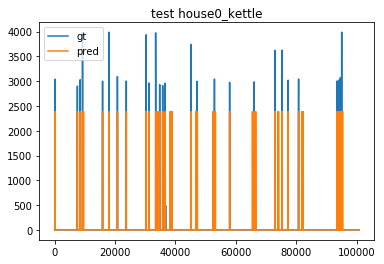

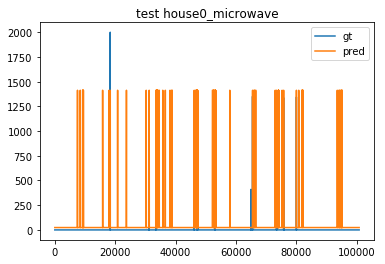

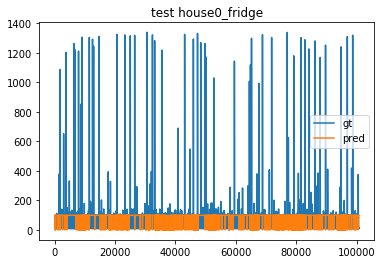

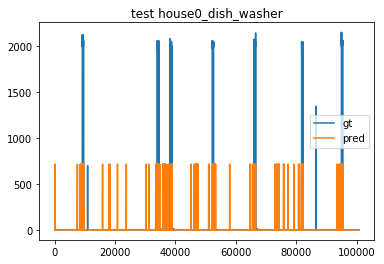

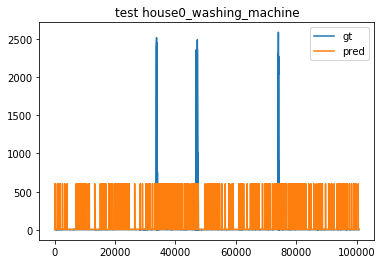

           dish_washer     fridge     kettle  microwave  washing_machine
F1            0.027296   0.556838   0.026557   0.998539         0.155316
accuracy      0.814423   0.697571   0.981338   0.997093         0.994841
mae          48.251533  60.925164  38.018305  43.633788        67.913209
maep         48.251533  60.925164  38.018305  43.633788        67.913209
nde           0.802739   1.502675   1.259963   6.844581         2.851646
precision     0.380028   0.398539   0.397110   0.997083         0.487384
re            0.821395   0.657208   0.027307   0.998380         0.548992
recall        0.014156   0.923748   0.013738   1.000000         0.092377
sae           0.619494   1.200408   1.158142  12.710002         3.895139
{'F1': 0.3529092896361297,
 'accuracy': 0.8970533960354782,
 'mae': 51.748399706331725,
 'maep': 51.748399706331725,
 'nde': 2.6523210017421563,
 'precision': 0.532028807558034,
 're': 0.610656428097962,
 'recall': 0.4088037640953678,
 'sae': 3.9166369538023282}


In [90]:
import pprint
ip, op = fhmm.get_all_metrics()#individual performance, overall performance
print(ip)
pprint.pprint(op)